Project 1: Alex and Griffith

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

In [348]:
def plot_results(TotalCatPop, CatNeutered, CatNotNeutered, RatPop, title):
    """Plot the estimates and the model.
    
    TotalCatPop: Timeseries of the total cat population    
    CatNeutered: Timeseries of neutered cat population simulation results
    RatPop:  TimeSeries of rat population simulation results
    title: string - gives the graph a title
    """
    plot(TotalCatPop, label='Total Cat Population')
    plot(CatNeutered, '--', label='Neutered Cats')
    plot(CatNotNeutered, '-', label = 'Not Neutered Cats')
    plot(RatPop, label='Rat Population')
    
    decorate(xlabel = 'Year',
             ylabel = 'NYC Population (million)',
            title=title)

In [132]:
def run_simulation(group, rates, timescale, update_func):
    """Simulate the system using any update function. Predicts the cat/rat pop
    
    group: Population of the group in question
    rates: System object - Death rates and growth rates
    timescale: int how far into the future the predictions go
    update_func: function that computes the population for next year
    
    returns: TimeSeries
    """
    pop = TimeSeries() #Stores the population prediction in a TimeSeries
    pop[0]=group
    for year in range(timescale): #Runs through all the years through the end of timescale
        pop[year+1] = update_func(pop[year], rates)
    return pop

In [305]:
def population_update_cat_not_neutered(pop, rates):
    """Update the cat population for the next year.
    
    pop: current cat population in millions
    rates: system object with death and growth rates
    """
    growth = (rates.cat_growth_coefficient * pop) - (rates.cat_death_coefficient * pop) - (rates.cats_neutered)
    if(pop + growth <= 0): #Checks to see if population is 0
        pop = 0
        return pop
    return pop + growth

In [306]:
def population_update_cat_neutered(pop, rates):
    """Update the neutered cat population for the next year.
    
    pop: current neutered cat population in millions 
    year: what year it is
    rates: system object with death and growth rates
    """
    growth = (rates.cats_neutered) - (rates.cat_death_coefficient * pop)
    if(pop + growth <= 0): #Checks to see if population is 0
        pop = 0
        return pop
    return pop + growth

In [307]:
def run_simulation_rat(ratPop, catPopHistory, rates, timescale, update_func):
    """Simulate the system. Predicts the rat population. 
    
    Uses the by year cat population to predict that years rat population.
    
    ratPop: State object with initial rat population
    catPopHistory: Timeseries with cat pop history
    rates: System object - death rates and growth rates
    timescale: int - how far into the future the predictions go
    update_func: function that computes the population for next year
    
    returns: TimeSeries
    """
    pop = TimeSeries() #Stores the population prediction in a TimeSeries
    pop[0] = ratPop
    for year in range(timescale):
        pop[year+1] = update_func(catPopHistory, pop[year], year, rates)
    return pop

In [308]:
def population_update_rat(catPopHistory, pop, year, rates):
    """Update the rat population for the next year.
    
    catPopHistory: Timeseries with cat population history
    pop: current rat population in millions
    year: what year it is
    rates: system object with death and growth rates
    """
    catPop = catPopHistory[year] #The cat population for that year
    pop_change = (rates.rat_growth_coefficient * pop)-(rates.rat_death_coefficient * catPop)
    if(pop + pop_change <= 0): #Checks to see if population is 0
        pop = 0
        return pop
    return pop + pop_change

In [322]:
#This cell establishes the model parameters

populations = State(cats_not_neutered=2, cats_neutered = .6, rat=40) #Establishes the cat and rat population
rates = System()#Opens an empty rate System

,values


In [359]:
#This cell allows easy access to change model parameters such as cat population
#All need updating except cat_death_coefficient
rates.rat_growth_coefficient = .21 #Establishes how rats grow without cat influence
rates.rat_death_coefficient = .2 #Establishes how rat pop dies with cat influence

timescale = 30 #Sets the timescale for the predictions in years
rates.cat_growth_coefficient = .5 #Establishes how cats grow
rates.cat_death_coefficient = .2 #Establishes the cat death

rates.cats_neutered = .4 #Establishes how many non-neutered cats are neutered per year in millions

Saving figure to file figs/project-1.pdf


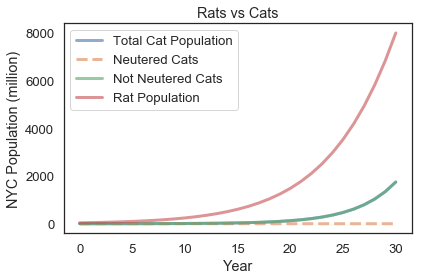

In [360]:
resultsCats_neutered = run_simulation(populations.cats_neutered, rates, timescale, population_update_cat_neutered)
resultsCats_not_neutered = run_simulation(populations.cats_not_neutered, rates, timescale, population_update_cat_not_neutered)
totalCatPop = resultsCats_neutered + resultsCats_not_neutered
resultsRats = run_simulation_rat (populations.rat, totalCatPop, rates, timescale, population_update_rat)

plot_results(totalCatPop, resultsCats_neutered, resultsCats_not_neutered, resultsRats, 'Rats vs Cats')
savefig('figs/project-1.pdf')

***What portion of the cat population in NYC would have to be neutered to maintain cat and rat populations?***



Data:

 - 17% of Cats disappear over 11 years - 1.54% cat populationa year death rate

To Do:
- QMRI
- Plug in more reasonable data: neutered cat numbers, not neutered cats, cats neutered a year, rat popultaion, rat growth rate
- Add randomness factor

Assumptions/Notes:
* Cat population independent of rat popualtion
* Will be neutered from existing cat population